In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Importing DataLoaders for each model. These models include rule-based, vanilla DQN and encoder-decoder DQN.
from DataLoader.DataLoader import YahooFinanceDataLoader
from DataLoader.DataForPatternBasedAgent import DataForPatternBasedAgent
from DataLoader.DataAutoPatternExtractionAgent import DataAutoPatternExtractionAgent
from DataLoader.DataSequential import DataSequential 

from DeepRLAgent.MLPEncoder.Train import Train as SimpleMLP
from DeepRLAgent.SimpleCNNEncoder.Train import Train as SimpleCNN
from EncoderDecoderAgent.GRU.Train import Train as gru
from EncoderDecoderAgent.CNN.Train import Train as cnn
from EncoderDecoderAgent.CNN2D.Train import Train as cnn2d
from EncoderDecoderAgent.CNNAttn.Train import Train as cnn_attn
from EncoderDecoderAgent.CNN_GRU.Train import Train as cnn_gru


# Imports for Deep RL Agent
from DeepRLAgent.VanillaInput.Train import Train as DeepRL



# Imports for RL Agent with n-step SARSA
# from RLAgent.Train import Train as RLTrain

# Imports for Rule-Based
from PatternDetectionInCandleStick.LabelPatterns import label_candles
from PatternDetectionInCandleStick.Evaluation import Evaluation


import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# from kaleido.scopes.plotly import PlotlyScope
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import os
import random

CURRENT_PATH = os.getcwd()

In [3]:
BATCH_SIZE = 10
GAMMA=0.7
n_step = 10

initial_investment = 1000

In [4]:
train_portfolios = {}
test_portfolios = {}
window_size_experiment = {}
window_sizes = [3, 5, 8, 10, 12, 15, 20, 25, 30, 40, 50, 75]

In [5]:
def add_train_portfo(model_name, portfo):
    counter = 0
    key = f'{model_name}'
    while key in train_portfolios.keys():
        counter += 1
        key = f'{model_name}{counter}'
        
    train_portfolios[key] = portfo

def add_test_portfo(model_name, portfo):
    counter = 0
    key = f'{model_name}'
    while key in test_portfolios.keys():
        counter += 1
        key = f'{model_name}{counter}'
    
    test_portfolios[key] = portfo

In [6]:
# GOOGL

DATASET_NAME = 'GOOGL'
DATASET_FOLDER = 'GOOGL'
FILE = 'GOOGL.csv'
data_loader = YahooFinanceDataLoader(DATASET_FOLDER, '2018-01-01', load_from_file=True)
transaction_cost = 0.0

In [7]:
# Agent with Auto pattern extraction
# State Mode
state_mode = 1  # OHLC
# state_mode = 2  # OHLC + trend
# state_mode = 3  # OHLC + trend + %body + %upper-shadow + %lower-shadow
window_size = None

In [8]:
dataTrain_autoPatternExtractionAgent = DataAutoPatternExtractionAgent(data_loader.data_train, state_mode, 'action_encoder_decoder', device, GAMMA, n_step, BATCH_SIZE, window_size, transaction_cost)
dataTest_autoPatternExtractionAgent = DataAutoPatternExtractionAgent(data_loader.data_test, state_mode, 'action_encoder_decoder', device, GAMMA, n_step, BATCH_SIZE, window_size, transaction_cost)
dataTrain_patternBased = DataForPatternBasedAgent(data_loader.data_train, data_loader.patterns, 'action_deepRL', device, GAMMA, n_step, BATCH_SIZE, transaction_cost)
dataTest_patternBased = DataForPatternBasedAgent(data_loader.data_test, data_loader.patterns, 'action_deepRL', device, GAMMA, n_step, BATCH_SIZE, transaction_cost)

In [9]:
BATCH_SIZE = 10
EPS = 0.1
# EPS_START = 0.9
# EPS_END = 0.05
# EPS_DECAY = 200

ReplayMemorySize = 20

TARGET_UPDATE = 5
n_actions = 3
# window_size = 20

num_episodes = 3

In [18]:
n_classes = 64

simpleMLP = SimpleMLP(data_loader, dataTrain_autoPatternExtractionAgent, dataTest_autoPatternExtractionAgent, DATASET_NAME,
                        state_mode, window_size, transaction_cost, n_classes, BATCH_SIZE=BATCH_SIZE, GAMMA=GAMMA, 
                        ReplayMemorySize=ReplayMemorySize, TARGET_UPDATE=TARGET_UPDATE, n_step=n_step)
# ↓原来的
# simpleMLP = SimpleMLP(data_loader, dataTrain_patternBased, dataTest_patternBased, DATASET_NAME, 
#                     state_mode, window_size, transaction_cost, n_classes, BATCH_SIZE=BATCH_SIZE, GAMMA=GAMMA, EPS=EPS,
#                     ReplayMemorySize=ReplayMemorySize, TARGET_UPDATE=TARGET_UPDATE, n_actions=n_actions, n_step=n_step)

simpleMLP.train(num_episodes)
file_name = None

file_name = 'GOOGL; MLP; StateMode(1); WindowSize(20); TRAIN_TEST_SPLIT(True); BATCH_SIZE10; GAMMA0.7; EPSILON0.1; REPLAY_MEMORY_SIZE20; C5; N_SARSA10; EXPERIMENT.pkl'
# file_name = 'AAPL; MLP; StateMode(1); WindowSize(20); TRAIN_TEST_SPLIT(True); BATCH_SIZE10; GAMMA0.7; EPSILON0.1; REPLAY_MEMORY_SIZE20; C5; N_SARSA10; EXPERIMENT.pkl'
# file_name = 'KSS; DATA_KIND(AutoPatternExtraction); BEGIN_DATE(None); END_DATE(None); SPLIT_POINT(2018-01-01); MLP; TC(0.0); StateMode(1); WindowSize(3); BATCH_SIZE10; GAMMA0.7; EPS0.1; REPLAY_MEMORY_SIZE20; C5; N_SARSA10(1).pkl'
# file_name = 'BTC-USD; MLP; StateMode(1); WindowSize(20); TRAIN_TEST_SPLIT(True); BATCH_SIZE10; GAMMA0.7; EPSILON0.1; REPLAY_MEMORY_SIZE20; C5; N_SARSA10; EXPERIMENT.pkl'
# file_name = 'GE; DATA_KIND(AutoPatternExtraction); BEGIN_DATE(None); END_DATE(None); SPLIT_POINT(2015-01-01); MLP; TC(0); StateMode(1); WindowSize(20); BATCH_SIZE10; GAMMA0.7; EPS0.1; REPLAY_MEMORY_SIZE20; C5; N_SARSA10.pkl'
# file_name = 'HSI; DATA_KIND(AutoPatternExtraction); BEGIN_DATE(None); END_DATE(None); SPLIT_POINT(2015-01-01); MLP; TC(0); StateMode(1); WindowSize(20); BATCH_SIZE10; GAMMA0.7; EPS0.1; REPLAY_MEMORY_SIZE20; C5; N_SARSA10.pkl'
# file_name = 'AAL; DATA_KIND(AutoPatternExtraction); BEGIN_DATE(None); END_DATE(None); SPLIT_POINT(2018-01-01); MLP; TC(0); StateMode(1); WindowSize(15); BATCH_SIZE10; GAMMA0.7; EPS0.1; REPLAY_MEMORY_SIZE20; C5; N_SARSA10.pkl'

ev_simpleMLP_train = simpleMLP.test(
                                  initial_investment=initial_investment, test_type='train')
# ↓原来的
# ev_simpleMLP = simpleMLP.test(file_name=file_name, action_name=dataTrain_patternBased.action_name,
#                                   initial_investment=initial_investment, test_type='train')
simpleMLP_portfolio_train = ev_simpleMLP_train.get_daily_portfolio_value()
ev_simpleMLP_test = simpleMLP.test(
                                  initial_investment=initial_investment, test_type='test')
simpleMLP_portfolio_test = ev_simpleMLP_test.get_daily_portfolio_value()

model_kind = 'MLP-vanilla'
# model_kind = 'MLP'

add_train_portfo(model_kind, simpleMLP_portfolio_train)
add_test_portfo(model_kind, simpleMLP_portfolio_test)

Training MLP ...


100%|██████████| 3/3 [00:20<00:00,  6.70s/it]


Complete


In [11]:
# ev_simpleMLP_new = Evaluation(ev_simpleMLP.data, ev_simpleMLP.action_label, 1000)
# ev_simpleMLP_new.evaluate()

In [12]:
ev_RuleBased = Evaluation(dataTrain_patternBased.data, 'action', 1000)
print('train')
ev_RuleBased.evaluate()
ruleBased_portfolio_train = ev_RuleBased.get_daily_portfolio_value()
ev_RuleBased = Evaluation(dataTest_patternBased.data, 'action', 1000)
print('test')
ev_RuleBased.evaluate()
ruleBased_portfolio_test = ev_RuleBased.get_daily_portfolio_value()

add_train_portfo('Rule-Based', ruleBased_portfolio_train)
add_test_portfo('Rule-Based', ruleBased_portfolio_test)

train
Historical VAR is -2.0
Variance-Covariance VAR with 95% confidence is -1.6816508656873226
Variance-Covariance VAR with 99% confidence is -2.3746948588190677
##################################################
Arithmetic Return: 15.26181146613458
##################################################
Average daily return: 0.007581625169465762
##################################################
Daily return variance (return type: Arithmetic): 1.0387326479584653
##################################################
Daily return variance (return type: Logarithmic): 1.0231202412042586
##################################################
Time weighted return: -2.4255518512705798e-05
##################################################
Total Return: -4.765408198463296 %
##################################################
Sharp Ratio: 0.0026618004420994198
##################################################
Value at Risk (Monte Carlo method): -1.6707589939472038
########################################

In [13]:
dataTrain_patternBased.data[dataTrain_patternBased.action_name] = 'buy'
ev_BandH = Evaluation(dataTrain_patternBased.data, dataTrain_patternBased.action_name, initial_investment)
print('train')
ev_BandH.evaluate()
BandH_portfolio_train = ev_BandH.get_daily_portfolio_value()

dataTest_patternBased.data[dataTest_patternBased.action_name] = 'buy'
ev_BandH = Evaluation(dataTest_patternBased.data, dataTest_patternBased.action_name, initial_investment)
print('test')
ev_BandH.evaluate()
BandH_portfolio_test = ev_BandH.get_daily_portfolio_value()

add_train_portfo('B&H', BandH_portfolio_train)
add_test_portfo('B&H', BandH_portfolio_test)

train
Historical VAR is -3.0
Variance-Covariance VAR with 95% confidence is -2.484599691006164
Variance-Covariance VAR with 99% confidence is -3.5085559272996134
##################################################
Arithmetic Return: 143.75621206735073
##################################################
Average daily return: 0.07141391558238983
##################################################
Daily return variance (return type: Arithmetic): 2.267487832708145
##################################################
Daily return variance (return type: Logarithmic): 2.234097905317042
##################################################
Time weighted return: 0.0006014608689324241
##################################################
Total Return: 235.47483780049527 %
##################################################
Sharp Ratio: 0.047403680448813997
##################################################
Value at Risk (Monte Carlo method): -2.408294963796691
###############################################

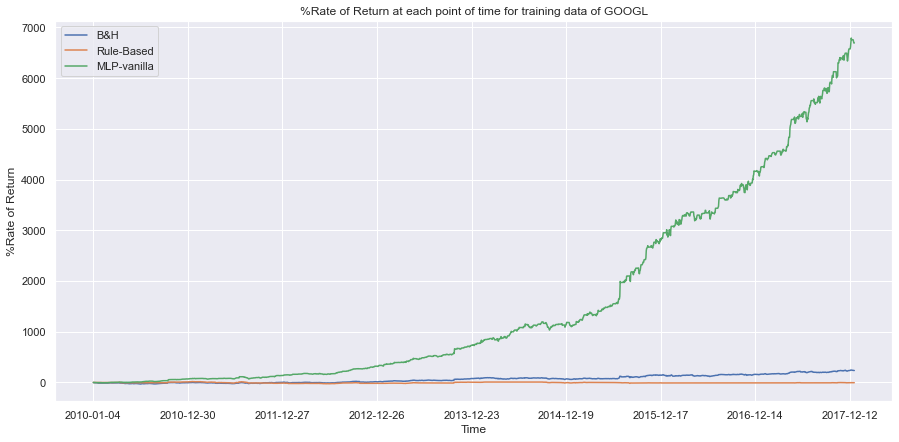

In [14]:
experiment_num = 1
RESULTS_PATH = 'TestResults/Train/'

import os

if not os.path.exists(RESULTS_PATH):
    os.mkdir(RESULTS_PATH)

while os.path.exists(f'{RESULTS_PATH}{DATASET_NAME};train;EXPERIMENT({experiment_num}).jpg'):
    experiment_num += 1

fig_file = f'{RESULTS_PATH}{DATASET_NAME};train;EXPERIMENT({experiment_num}).jpg'

sns.set(rc={'figure.figsize': (15, 7)})

items = list(test_portfolios.keys())
random.shuffle(items)

first = True
for k in items:
    profit_percentage = [(train_portfolios[k][i] - train_portfolios[k][0])/train_portfolios[k][0] * 100 
              for i in range(len(train_portfolios[k]))]
    difference = len(train_portfolios[k]) - len(data_loader.data_train_with_date)
    df = pd.DataFrame({'date': data_loader.data_train_with_date.index, 
                       'portfolio':profit_percentage[difference:]})
    if not first:
        df.plot(ax=ax, x='date', y='portfolio', label=k)
    else:
        ax = df.plot(x='date', y='portfolio', label=k)
        first = False

ax.set(xlabel='Time', ylabel='%Rate of Return')
ax.set_title(f'%Rate of Return at each point of time for training data of {DATASET_NAME}')
        
plt.legend()
plt.savefig(fig_file, dpi=300)

In [15]:
train_portfolios['MLP-vanilla'][-1]

67934.67989268964

In [16]:
# shuffle = False
shuffle = True

KeyboardInterrupt: 

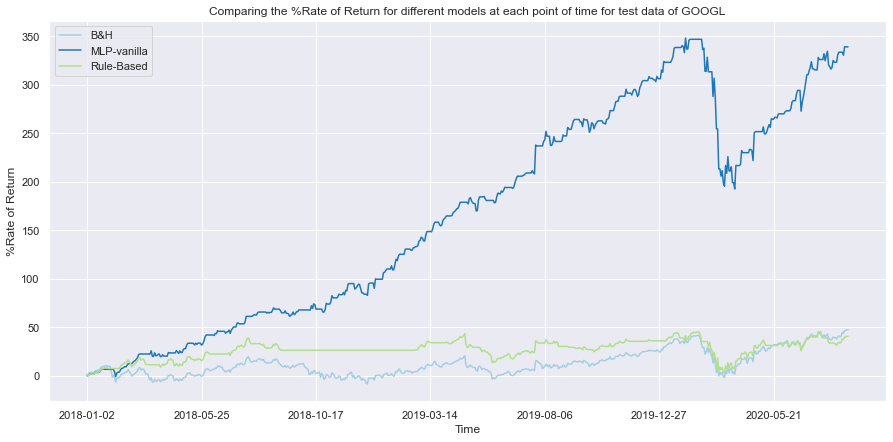

In [17]:
import random

experiment_num = 1
RESULTS_PATH = 'TestResults/Test/'

import os

if not os.path.exists(RESULTS_PATH):
    os.mkdir(RESULTS_PATH)

while os.path.exists(f'{RESULTS_PATH}{DATASET_NAME};test;EXPERIMENT({experiment_num}).jpg'):
    experiment_num += 1

fig_file = f'{RESULTS_PATH}{DATASET_NAME};test;EXPERIMENT({experiment_num}).jpg'

sns.set(rc={'figure.figsize': (15, 7)})
sns.set_palette(sns.color_palette("Paired", 15))

items = list(test_portfolios.keys())

if shuffle:
    random.shuffle(items)

first = True
for k in items:
    profit_percentage = [(test_portfolios[k][i] - test_portfolios[k][0])/test_portfolios[k][0] * 100 
                  for i in range(len(test_portfolios[k]))]
    difference = len(test_portfolios[k]) - len(data_loader.data_test_with_date)
    df = pd.DataFrame({'date': data_loader.data_test_with_date.index, 
                       'portfolio':profit_percentage[difference:]})
    if not first:
        df.plot(ax=ax, x='date', y='portfolio', label=k)
    else:
        ax = df.plot(x='date', y='portfolio', label=k)
        first = False
        
ax.set(xlabel='Time', ylabel='%Rate of Return')
ax.set_title(f'Comparing the %Rate of Return for different models '
             f'at each point of time for test data of {DATASET_NAME}')
plt.legend()
plt.savefig(fig_file, dpi=300)

In [ ]:
test_portfolios['MLP-vanilla'][-1]

3701.0751071503637